In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score,recall_score
from sklearn import metrics
%matplotlib inline

In [3]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",
                     sheet_name = "Data")

In [4]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.shape

(5000, 14)

In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
#df.drop('ID',inplace=True,axis=1)

* Information of the attributes
  The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
The binary category have five variables as below:

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

* Age - Age of the customer
* Experience - Years of experience
* Income - Annual income in dollars
* CCAvg - Average credit card spending
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:

* Family - Family size of the customer
* Education - education level of the customer

The nominal variable is :

* ID
* Zip Code


In [10]:
# No columns have null data in the file
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
#finding unique data
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

* Dataset has no missing values
* As we have observed from the 5 point summary of the data Experience column has negative values which has no meaning.

###  Data Cleaning

#### Handling missing values / unknown / negative values in data

In [12]:
# There are 52 records with negative experience. Before proceeding any further we need to clean the same
df[df['Experience'] < 0]['Experience'].count()


52

In [13]:
# Cheching the correlation of Experience with other variables.

df.corr()['Experience']

ID                   -0.008326
Age                   0.994215
Experience            1.000000
Income               -0.046574
ZIP Code             -0.028626
Family               -0.052563
CCAvg                -0.050089
Education             0.013152
Mortgage             -0.010582
Personal Loan        -0.007413
Securities Account   -0.001232
CD Account            0.010353
Online                0.013898
CreditCard            0.008967
Name: Experience, dtype: float64

Experience has positive corelation with Age.

* We can replace negative 'Experience' values with the median of total remaining 'Experience' values but it will be not appropriate. So, we will derive various medians of Experience data on the basis of group of respective Age of Customers.
* Steps Taken to derive median of Experiences on the basis of Age groups -: 
    1. Creating a group of 'Age' values where  negative values in 'Experience' exists.
    2. Creating a list of indexes of negative values in 'Experience'.
    3. Replace negative 'Experience' values with the 'Experience' meadian.


In [14]:
# Creating a list of ages.
ages = df[df['Experience'] < 0]['Age'].unique().tolist()

# Creating a list of indexes.
indexes = df[df['Experience'] < 0].index.tolist()

# Replacing Negative Value with median.
for i in indexes:
    for x in ages:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.median()
        

In [15]:
# checking if there are records with negative experience
df[df['Experience'] < 0]['Experience'].count()

0

In [16]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Detecting Outliers


In [17]:
# Outlier is defined as Data points above or below than 1.5 times the Inter Quartile Range of the data.
numerical = ['Age','Income','Experience','CCAvg','Mortgage']
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1
out = (df[numerical] < (Q1 - 1.5 * IQR)) | (df[numerical] > (Q3 + 1.5 * IQR))
out.sum()

Age             0
Income         96
Experience      0
CCAvg         324
Mortgage      291
dtype: int64

<AxesSubplot:xlabel='Income'>

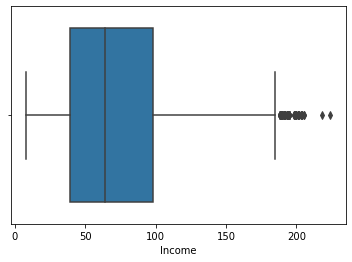

In [18]:
sns.boxplot(x=df['Income'])

<AxesSubplot:xlabel='CCAvg'>

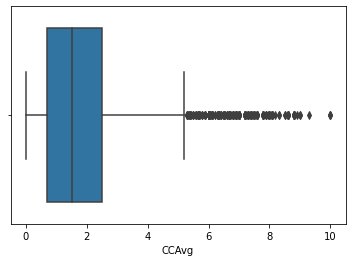

In [19]:
sns.boxplot(x=df['CCAvg'])

<AxesSubplot:xlabel='Mortgage'>

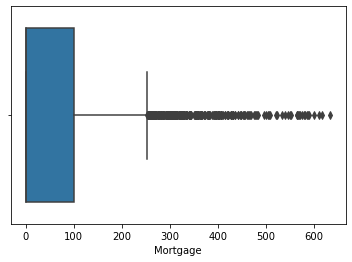

In [20]:
sns.boxplot(x=df['Mortgage'])

Age,CCAvg and Mortgate contains many outliers.

##   Distribution of Numerical Features

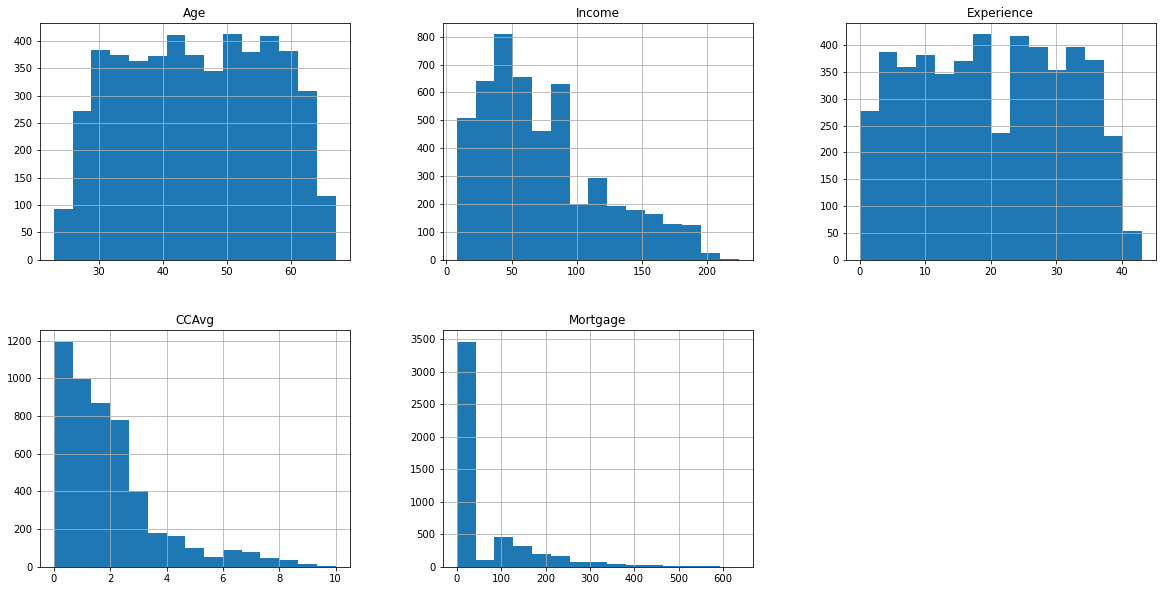

In [21]:
df[numerical].hist(bins=15, figsize=(20, 10), layout=(2, 3));

* Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm     this by looking at the describe statement above, which shows mean is almost equal to median
* Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to         median. There are negative values in the Experience. This could be a data input error as in general it is not possible to       measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
* Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean   is greater than the median
* CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
* Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K



### Distribution of categorical features and their relation with the target feature

C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


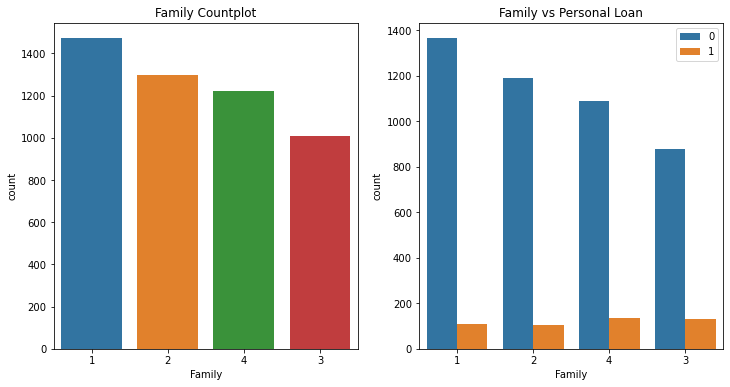

In [22]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Family'],hue=df['Personal Loan'],ax=axes[1],order = df["Family"].value_counts().index)
plt.legend()
ax.set_title('Family vs Personal Loan')
ax = sns.countplot(df['Family'],ax=axes[0],order = df["Family"].value_counts().index)
plt.legend()
ax.set_title('Family Countplot')
plt.show()

 * Majority of the customers have family size 1.
 * More number of family size have accepted the loan

C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


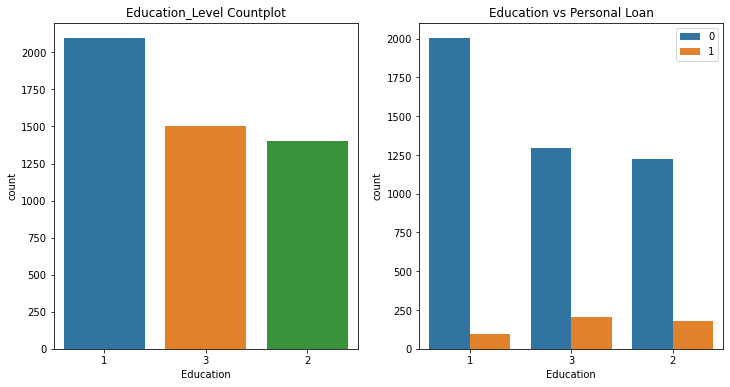

In [23]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Education'],hue=df['Personal Loan'],ax=axes[1],order = df["Education"].value_counts().index)
plt.legend()
ax.set_title('Education vs Personal Loan')
ax = sns.countplot(df['Education'],ax=axes[0],order = df["Education"].value_counts().index)
plt.legend()
ax.set_title('Education_Level Countplot')
plt.show()

More than 2000 customres has Undergraduate and very less to accept for loan
Customers who are Graduate and Professional are more likely to accept loan than undergraduate.

C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


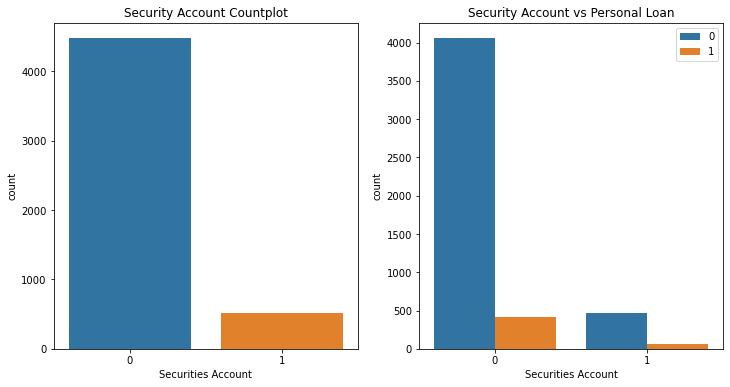

In [24]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Securities Account'],hue=df['Personal Loan'],ax=axes[1])
plt.legend()
ax.set_title('Security Account vs Personal Loan')
ax = sns.countplot(df['Securities Account'],ax=axes[0])
plt.legend()
ax.set_title('Security Account Countplot')
plt.show()

More than 4000 customers do not have Securities Account

C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


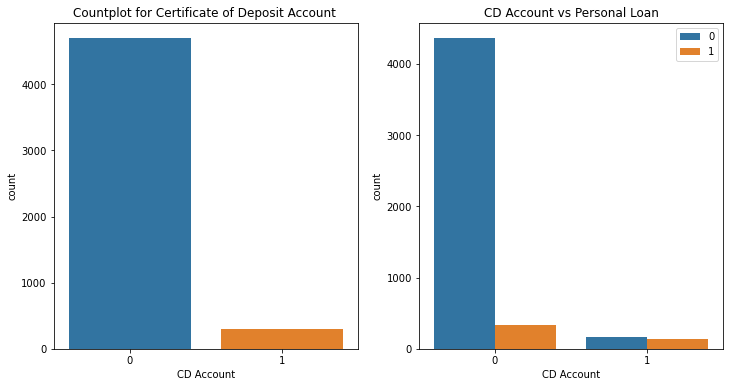

In [25]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['CD Account'],hue=df['Personal Loan'],ax=axes[1])
plt.legend()
ax.set_title('CD Account vs Personal Loan')
ax = sns.countplot(df['CD Account'],ax=axes[0])
plt.legend()
ax.set_title('Countplot for Certificate of Deposit Account ')
plt.show()

Most of the customer do not have CD Account.
Almost al customers who has CD Account has accepted the loan 

C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


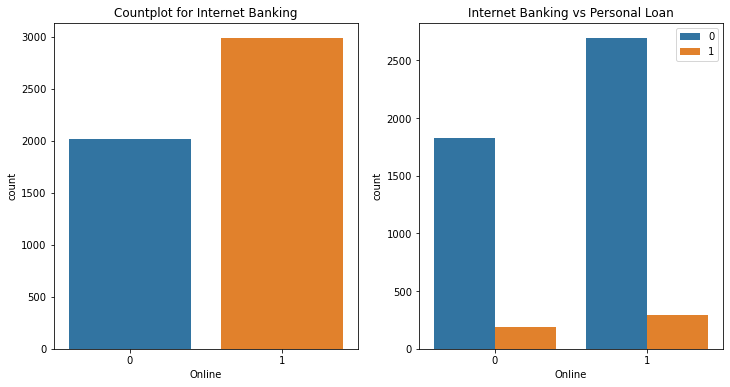

In [26]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Online'],hue=df['Personal Loan'],ax=axes[1])
plt.legend()
ax.set_title('Internet Banking vs Personal Loan')
ax = sns.countplot(df['Online'],ax=axes[0])
plt.legend()
ax.set_title('Countplot for Internet Banking')
plt.show()

Most of the customers uses Online Banking

C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mugha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


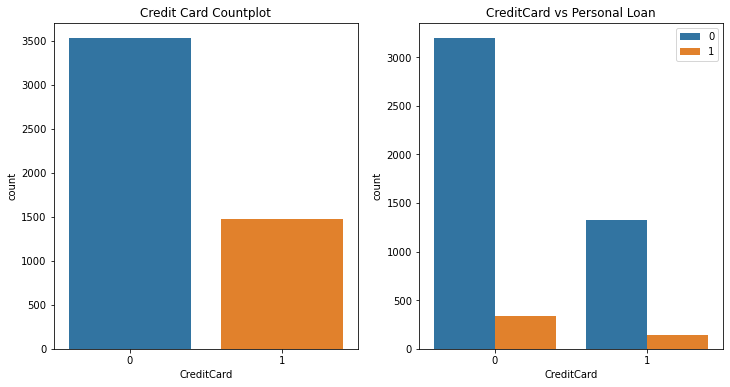

In [27]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['CreditCard'],hue=df['Personal Loan'],ax=axes[1])
plt.legend()
ax.set_title('CreditCard vs Personal Loan')
ax = sns.countplot(df['CreditCard'],ax=axes[0])
plt.legend()
ax.set_title('Credit Card Countplot')
plt.show()

Most of the customer do not use credit card offered by the bank.


#### Relationship of some numerical features with target feature

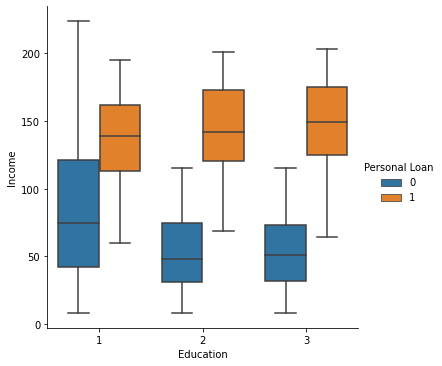

In [28]:
sns.catplot(x='Education', y = 'Income', data = df,kind= 'box',hue='Personal Loan')

* From the above plot we can infer that customer having annual income in the range of (120 and 170)$ has accepted the loan.
* It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

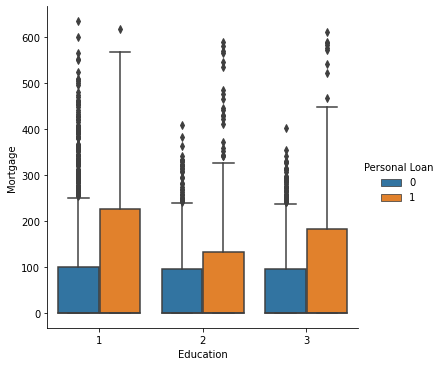

In [29]:
sns.catplot(x='Education',y='Mortgage',data=df,hue='Personal Loan',kind='box')

From the above chart it seems that customer who has personal loan have high mortgage

#### Distribution of the target column

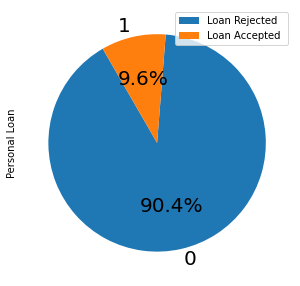

In [30]:
fig,ax = plt.subplots( figsize=(7,5) )
df['Personal Loan'].value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%', fontsize= 20,startangle=120)
plt.legend(['Loan Rejected','Loan Accepted '])
plt.show()

* The dataset is biased
* The percentage of customers who has accepted the loan is very less

##### Corelation amaong the attributes

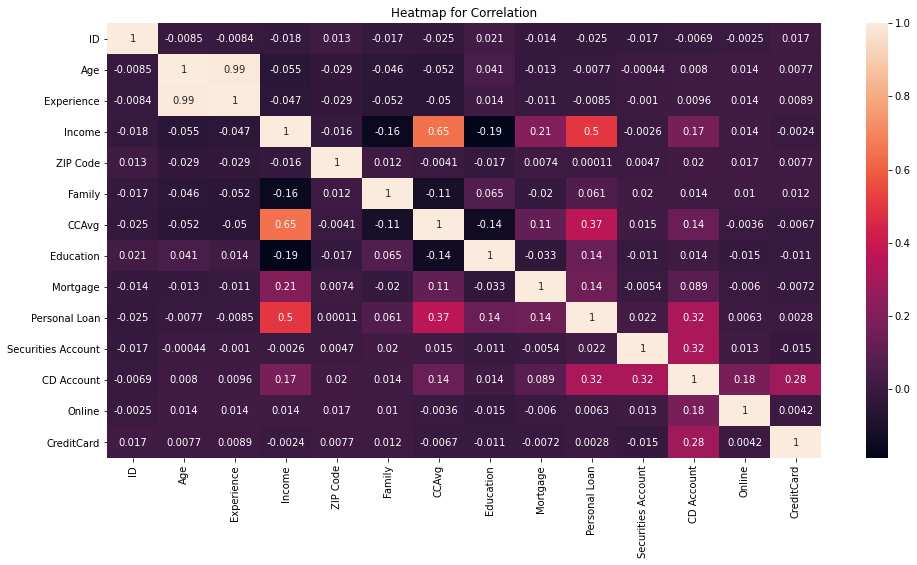

In [31]:
# Plot for Visualising the correlation between variables and Target Column.

fig,ax = plt.subplots( figsize=(16,8) )
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap for Correlation')
plt.show()

* Income , CD Account and CCAvg column  are slightly corelated with the Target column
* Others columns such as Income and CCavg are positively corelated.
* Experirnce and Age are highly corelated

### Separating the target column

In [32]:
# Creating seperate DataSets for Target column('Personal Loan') named as 'y' and rest of the features in 'X' 

y = df["Personal Loan"]
X = df.drop("Personal Loan",axis=1)
 
y.head(50)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    1
39    0
40    0
41    0
42    1
43    0
44    0
45    0
46    0
47    1
48    0
49    0
Name: Personal Loan, dtype: int64

In [33]:
X.drop('ID',axis=1,inplace=True)

In [34]:
X.drop('ZIP Code',axis=1,inplace=True)

### Splitting the data

In [35]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Scaling the features

In [36]:
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

### Creating different ML Classification model

Decision Trees 

In [93]:
# Creating CART model with max_depth = 5

dt = DecisionTreeClassifier(criterion='entropy', min_weight_fraction_leaf=0.3, splitter='best', max_depth=2)
dt.fit(X_train_scaled,y_train)
dt_pred = dt.predict(X_test_scaled)
dt_training = dt.score(X_train_scaled,y_train)
dt_testing = dt.score(X_test_scaled,y_test)
dt_precision = precision_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred)
print("Traing Accuracy :", dt_training)
print("Testing Accuracy :",dt_testing )
print("F1 Score: ",dt_f1 )
print('Decision Tree Confusion matrix :\n\n',confusion_matrix(y_test, dt_pred) )

Traing Accuracy : 0.9022857142857142
Testing Accuracy : 0.908
F1 Score:  0.0
Decision Tree Confusion matrix :

 [[1362    0]
 [ 138    0]]


[Text(0.5, 0.75, 'X[4] <= 1.142\nentropy = 0.471\nsamples = 3500\nvalue = [3148, 352]'),
 Text(0.25, 0.25, 'entropy = 0.181\nsamples = 1384\nvalue = [1346, 38]'),
 Text(0.75, 0.25, 'entropy = 0.606\nsamples = 2116\nvalue = [1802, 314]')]

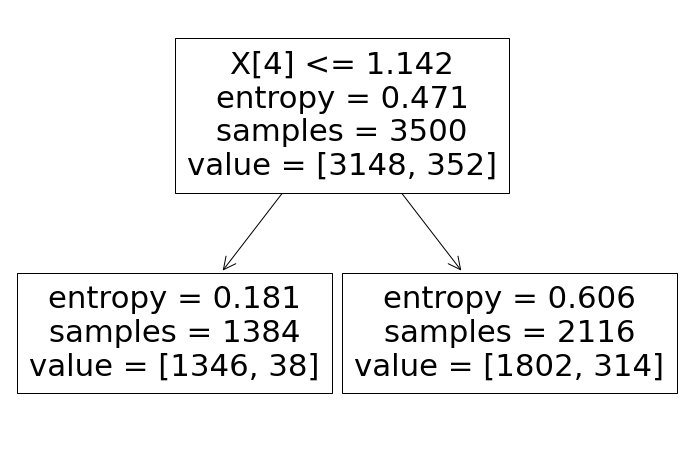

In [38]:

from sklearn import tree
plt.figure(figsize=(12,8))


tree.plot_tree(dt.fit(X_train, y_train)) 

# Select Method

### Separating the target column

In [39]:
# Creating seperate DataSets for Target column('Personal Loan') named as 'y' and rest of the features in 'X' 

y = df["Personal Loan"]
ind_feat = df.drop("Personal Loan",axis=1)
 

ind_feat.shape

(5000, 13)

In [91]:
from sklearn.feature_selection import SelectKBest, chi2
df.head(6)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13.0,29,92121,4,0.4,2,155,0,0,0,1,0


In [92]:
X= SelectKBest(chi2, k=4).fit_transform(ind_feat, y)
X.shape
X=pd.DataFrame(X)
X.head(6)

,0,1,2,3
0,1.0,49.0,1.6,0.0
1,2.0,34.0,1.5,0.0
2,3.0,11.0,1.0,0.0
3,4.0,100.0,2.7,0.0
4,5.0,45.0,1.0,0.0
5,6.0,29.0,0.4,155.0


In [42]:
# Create correlation matrix
corr_matrix = X.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.017695 -0.024672 -0.013920
1 -0.017695  1.000000  0.645993  0.206806
2 -0.024672  0.645993  1.000000  0.109909
3 -0.013920  0.206806  0.109909  1.000000


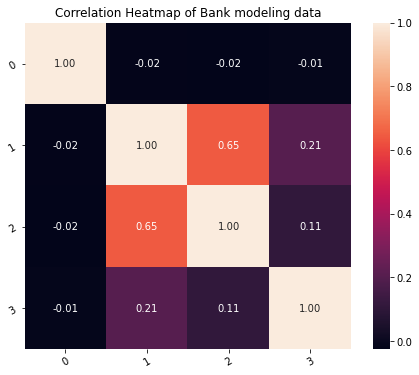

In [43]:
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Bank modeling data')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()   

### Splitting the data

In [44]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Scaling the features

In [45]:
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

### Creating different ML Classification model

Decision Trees 

In [46]:
# Creating CART model with max_depth = 5

dt = DecisionTreeClassifier(criterion='entropy', min_weight_fraction_leaf=0.3, splitter='random', max_depth=2)
dt.fit(X_train_scaled,y_train)
dt_pred = dt.predict(X_test_scaled)
dt_training = dt.score(X_train_scaled,y_train)
dt_testing = dt.score(X_test_scaled,y_test)
dt_precision = precision_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred)
print("Traing Accuracy :", dt_training)
print("Testing Accuracy :",dt_testing )
print("F1 Score: ",dt_f1 )
print('Decision Tree Confusion matrix :\n\n',confusion_matrix(y_test, dt_pred) )

Traing Accuracy : 0.9022857142857142
Testing Accuracy : 0.908
F1 Score:  0.0
Decision Tree Confusion matrix :

 [[1362    0]
 [ 138    0]]


C:\Users\mugha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.75, 'X[2] <= 1.819\nentropy = 0.462\nsamples = 3500\nvalue = [3158, 342]'),
 Text(0.25, 0.25, 'entropy = 0.192\nsamples = 2069\nvalue = [2008, 61]'),
 Text(0.75, 0.25, 'entropy = 0.715\nsamples = 1431\nvalue = [1150, 281]')]

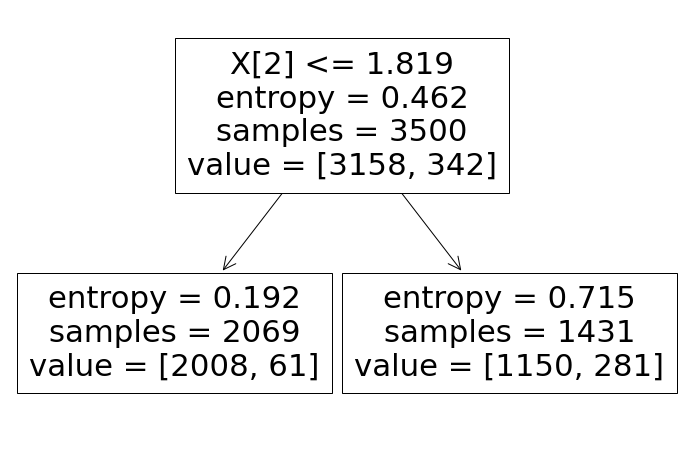

In [47]:

from sklearn import tree
plt.figure(figsize=(12,8))


tree.plot_tree(dt.fit(X_train, y_train)) 

# percentail method

### Separating the target column

In [48]:
# Creating seperate DataSets for Target column('Personal Loan') named as 'y' and rest of the features in 'X' 

y = df["Personal Loan"]
ind_feat = df.drop("Personal Loan",axis=1)
 
y.head(50)
ind_feat.shape

(5000, 13)

In [49]:

from sklearn.feature_selection import SelectPercentile, chi2
ind_feat.shape
ind_feat.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,1


In [50]:
# now select features based on top 10 percentile
X = SelectPercentile(chi2, percentile=10).fit_transform(ind_feat, y)
X.shape
X=pd.DataFrame(X)
X.head()

,0,1
0,49.0,0.0
1,34.0,0.0
2,11.0,0.0
3,100.0,0.0
4,45.0,0.0


In [51]:
# Create correlation matrix
corr_matrix = X.corr()
print(corr_matrix)

          0         1
0  1.000000  0.206806
1  0.206806  1.000000


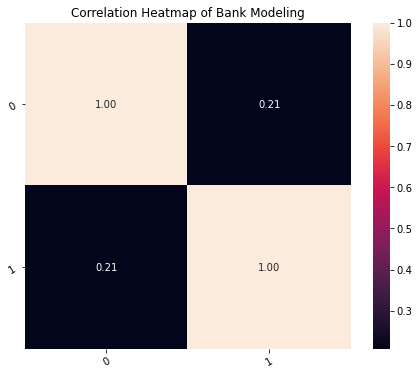

In [52]:
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Bank Modeling')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()   

### Splitting the data

In [53]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Scaling the features

In [54]:
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

### Creating different ML Classification model

Decision Trees 

In [55]:
# Creating CART model with max_depth = 5

dt = DecisionTreeClassifier(criterion='entropy', min_weight_fraction_leaf=0.3, splitter='random', max_depth=1)
dt.fit(X_train_scaled,y_train)
dt_pred = dt.predict(X_test_scaled)
dt_training = dt.score(X_train_scaled,y_train)
dt_testing = dt.score(X_test_scaled,y_test)
dt_precision = precision_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred)
print("Traing Accuracy :", dt_training)
print("Testing Accuracy :",dt_testing )
print("F1 Score: ",dt_f1 )
print('Decision Tree Confusion matrix :\n\n',confusion_matrix(y_test, dt_pred) )

Traing Accuracy : 0.9022857142857142
Testing Accuracy : 0.908
F1 Score:  0.0
Decision Tree Confusion matrix :

 [[1362    0]
 [ 138    0]]


C:\Users\mugha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.75, 'X[1] <= 60.605\nentropy = 0.462\nsamples = 3500\nvalue = [3158, 342]'),
 Text(0.25, 0.25, 'entropy = 0.442\nsamples = 2436\nvalue = [2213, 223]'),
 Text(0.75, 0.25, 'entropy = 0.505\nsamples = 1064\nvalue = [945, 119]')]

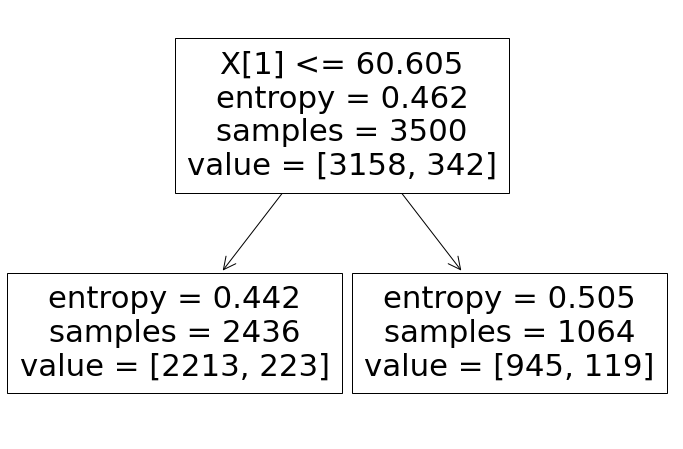

In [56]:

from sklearn import tree
plt.figure(figsize=(12,8))


tree.plot_tree(dt.fit(X_train, y_train)) 

In [57]:

import warnings
warnings.filterwarnings('ignore')


# Forward selection,


### Separating the target column

In [58]:
# Creating seperate DataSets for Target column('Personal Loan') named as 'y' and rest of the features in 'X' 

y = df["Personal Loan"]
X= df.drop("Personal Loan",axis=1)
 
y.head(50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [62]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
ind_feat.shape
ind_feat.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,1


In [66]:
sfs1 = SFS(RandomForestRegressor(), 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

X= sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    7.2s finished

[2022-06-25 15:52:43] Features: 1/3 -- score: 0.2377590920789253[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.5s finished

[2022-06-25 15:52:52] Features: 2/3 -- score: 0.6202356959712286[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    6.9s finished

[2022-06-25 15:52:59] Features: 3/3 -- score: 0.7876701566982977

In [67]:
X.k_feature_idx_


(3, 5, 7)

In [69]:
X_train.columns[list(X.k_feature_idx_)]

Index(['Income', 'Family', 'Education'], dtype='object')

### Splitting the data

In [70]:
 #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Scaling the features

In [71]:
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

### Creating different ML Classification model

Decision Trees 

In [76]:
# Creating CART model with max_depth = 5

dt = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt.fit(X_train_scaled,y_train)
dt_pred = dt.predict(X_test_scaled)
dt_training = dt.score(X_train_scaled,y_train)
dt_testing = dt.score(X_test_scaled,y_test)
dt_precision = precision_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred)
print("Traing Accuracy :", dt_training)
print("Testing Accuracy :",dt_testing )
print("F1 Score: ",dt_f1 )
print('Decision Tree Confusion matrix :\n\n',confusion_matrix(y_test, dt_pred) )

Traing Accuracy : 0.9877142857142858
Testing Accuracy : 0.984
F1 Score:  0.9083969465648856
Decision Tree Confusion matrix :

 [[1357    5]
 [  19  119]]


In [ ]:

from sklearn import tree
plt.figure(figsize=(12,8))


tree.plot_tree(dt.fit(X_train, y_train)) 

# PCA

### Separating the target column

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [78]:

# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(df)
Scaled_data=scaling.transform(df)
 
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
X=pd.DataFrame(x)
# Check the dimensions of data after PCA
print(X.shape)

(5000, 3)


In [79]:

# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[-0.02864033, -0.20783954, -0.20370757,  0.55079507,  0.0082491 ,
        -0.0768437 ,  0.4985195 , -0.10448044,  0.21231151,  0.4509565 ,
         0.08501061,  0.29136084,  0.04390491,  0.05671045],
       [-0.02171283,  0.67063031,  0.6715567 ,  0.13925084, -0.03909096,
        -0.08908022,  0.11703518,  0.00929196,  0.06263703,  0.15694378,
         0.0481741 ,  0.14422394,  0.04597688,  0.04865673],
       [ 0.01171371, -0.0433902 , -0.04977919, -0.2316174 ,  0.06447498,
         0.2656969 , -0.22997334,  0.2314991 , -0.06293894,  0.08734433,
         0.43952672,  0.5878138 ,  0.25504144,  0.38115453]])

Text(0, 0.5, 'pc2')

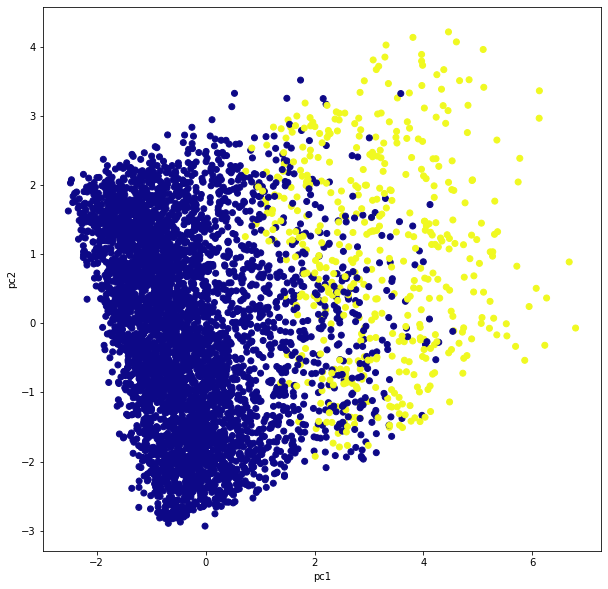

In [80]:

plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=df['Personal Loan'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [81]:

# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.16160859 0.14169073 0.10169312]


In [82]:
# Create correlation matrix
corr_matrix = X.corr()
print(corr_matrix)

              0             1             2
0  1.000000e+00 -1.853907e-16  2.721479e-16
1 -1.853907e-16  1.000000e+00  4.930762e-16
2  2.721479e-16  4.930762e-16  1.000000e+00


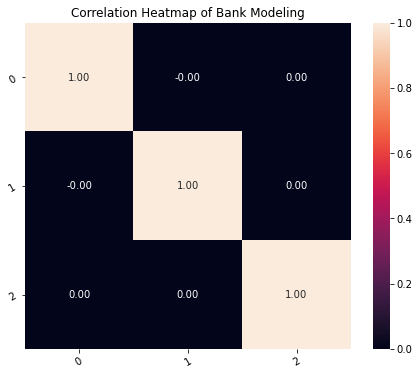

In [84]:
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Bank Modeling')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()   

In [85]:
# Creating seperate DataSets for Target column('Personal Loan') named as 'y' and rest of the features in 'X' 

y = df["Personal Loan"]
X.head()
 


,0,1,2
0,0.181903,-2.542330,0.964203
1,-0.647307,-0.267926,0.636102
2,-1.011025,-1.045222,-0.901918
3,0.591848,-1.227213,-1.274960
4,-0.620654,-1.641181,0.676569


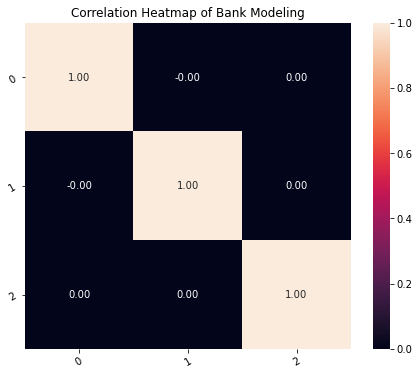

In [86]:
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Bank Modeling')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()   

### Splitting the data

In [87]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Scaling the features

### Creating different ML Classification model

Decision Trees 

In [88]:
# Creating CART model with max_depth = 5

dt = DecisionTreeClassifier(criterion='entropy', max_depth=100)
dt.fit(X_train_scaled,y_train)
dt_pred = dt.predict(X_test_scaled)
dt_training = dt.score(X_train_scaled,y_train)
dt_testing = dt.score(X_test_scaled,y_test)
dt_precision = precision_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred)
print("Traing Accuracy :", dt_training)
print("Testing Accuracy :",dt_testing )
print("F1 Score: ",dt_f1 )
print('Decision Tree Confusion matrix :\n\n',confusion_matrix(y_test, dt_pred) )

Traing Accuracy : 1.0
Testing Accuracy : 0.9846666666666667
F1 Score:  0.9125475285171103
Decision Tree Confusion matrix :

 [[1357    5]
 [  18  120]]


[Text(0.24301531456953643, 0.9705882352941176, 'X[0] <= 1.111\nentropy = 0.462\nsamples = 3500\nvalue = [3158, 342]'),
 Text(0.026490066225165563, 0.9117647058823529, 'X[0] <= 0.736\nentropy = 0.012\nsamples = 2841\nvalue = [2838, 3]'),
 Text(0.013245033112582781, 0.8529411764705882, 'entropy = 0.0\nsamples = 2706\nvalue = [2706, 0]'),
 Text(0.039735099337748346, 0.8529411764705882, 'X[1] <= 1.424\nentropy = 0.154\nsamples = 135\nvalue = [132, 3]'),
 Text(0.026490066225165563, 0.7941176470588235, 'entropy = 0.0\nsamples = 110\nvalue = [110, 0]'),
 Text(0.052980132450331126, 0.7941176470588235, 'X[2] <= -0.811\nentropy = 0.529\nsamples = 25\nvalue = [22, 3]'),
 Text(0.039735099337748346, 0.7352941176470589, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.06622516556291391, 0.7352941176470589, 'X[2] <= 1.41\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.052980132450331126, 0.6764705882352942, 'X[1] <= 1.842\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.03973

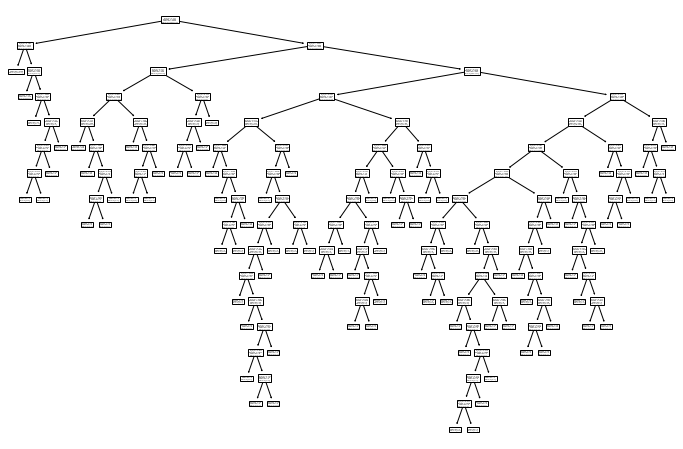

In [89]:

from sklearn import tree
plt.figure(figsize=(12,8))


tree.plot_tree(dt.fit(X_train, y_train)) 

In [ ]:
pip install mixtend